In [1]:
import numpy as np
import pandas as p
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_9319f604cbd54e56a04bf0a189e39fa5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='sZCwam6tshI-F2SNmxXNArionqvl0a2l_1THVgRa3FQ5',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_9319f604cbd54e56a04bf0a189e39fa5.get_object(Bucket='liverpatientanalysis-donotdelete-pr-uzrg2s8tjf3vwt',Key='Indian Liver Patient Dataset (ILPD).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()



,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [4]:
df.isnull().any()

age                 False
gender              False
tot_bilirubin       False
direct_bilirubin    False
tot_proteins        False
albumin             False
ag_ratio            False
sgpt                False
sgot                False
alkphos              True
is_patient          False
dtype: bool

In [5]:
df.fillna(df.mean(),inplace=True)

In [6]:
df.isnull().any()

age                 False
gender              False
tot_bilirubin       False
direct_bilirubin    False
tot_proteins        False
albumin             False
ag_ratio            False
sgpt                False
sgot                False
alkphos             False
is_patient          False
dtype: bool

In [7]:
x=df.iloc[:,:10].values

In [8]:
x

array([[65, 'Female', 0.7, ..., 6.8, 3.3, 0.9],
       [62, 'Male', 10.9, ..., 7.5, 3.2, 0.74],
       [62, 'Male', 7.3, ..., 7.0, 3.3, 0.89],
       ..., 
       [52, 'Male', 0.8, ..., 6.4, 3.2, 1.0],
       [31, 'Male', 1.3, ..., 6.8, 3.4, 1.0],
       [38, 'Male', 1.0, ..., 7.3, 4.4, 1.5]], dtype=object)

In [9]:
y=df.iloc[:,10:].values

In [10]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
    

In [11]:
from sklearn.preprocessing import LabelEncoder
lb_x=LabelEncoder()
lb_y=LabelEncoder()
x[:,1]=lb_x.fit_transform(x[:,1])
y[:,0]=lb_y.fit_transform(y[:,0])

In [12]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
ac_knn=accuracy_score(y_test,y_pred_knn)
confusion_matrix(y_test,y_pred_knn)
fpr, tpr, threshold=metrics.roc_curve(y_test,y_pred_knn)
roc_auc_knn=metrics.auc(fpr,tpr)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


In [16]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
ac_lr=accuracy_score(y_test,y_pred_lr)
confusion_matrix(y_test,y_pred_lr)
fpr, tpr, threshold=metrics.roc_curve(y_test,y_pred_lr)
roc_auc_lr=metrics.auc(fpr,tpr)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
from sklearn.svm import SVC
sv=SVC(kernel="rbf")
sv.fit(x_train,y_train)
y_pred_sv=sv.predict(x_test)
ac_sv=accuracy_score(y_test,y_pred_sv)
confusion_matrix(y_test,y_pred_sv)
fpr, tpr, threshold=metrics.roc_curve(y_test,y_pred_sv)
roc_auc_sv=metrics.auc(fpr,tpr)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
from sklearn.svm import SVC
svm=SVC(kernel="linear")
svm.fit(x_train,y_train)
y_pred_svm=svm.predict(x_test)
ac_svm=accuracy_score(y_test,y_pred_svm)
confusion_matrix(y_test,y_pred_svm)
fpr, tpr, threshold=metrics.roc_curve(y_test,y_pred_svm)
roc_auc_svm=metrics.auc(fpr,tpr)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
ac_dt=accuracy_score(y_test,y_pred_dt)
confusion_matrix(y_test,y_pred_dt)
fpr, tpr, threshold=metrics.roc_curve(y_test,y_pred_dt)
roc_auc_dt=metrics.auc(fpr,tpr)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1000)
rfc.fit(x_train,y_train)
y_pred_rfc=rfc.predict(x_test)
ac_rfc=accuracy_score(y_test,y_pred_rfc)
confusion_matrix(y_test,y_pred_rfc)
fpr, tpr, threshold=metrics.roc_curve(y_test,y_pred_rfc)
roc_auc_rfc=metrics.auc(fpr,tpr)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


In [21]:
x=["LR","KNN","Linear SVM","DT","Gaussian SVM","RFC"]
roc_auc=[roc_auc_lr,roc_auc_knn,roc_auc_svm,roc_auc_dt,roc_auc_sv,roc_auc_rfc]

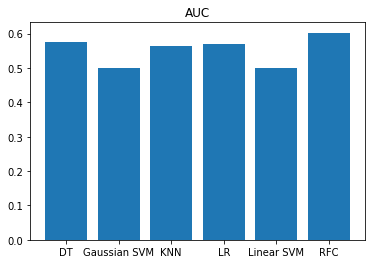

In [22]:
import matplotlib.pyplot as plt
plt.title('AUC')
plt.bar(x, roc_auc)
plt.show()

<function matplotlib.pyplot.legend>

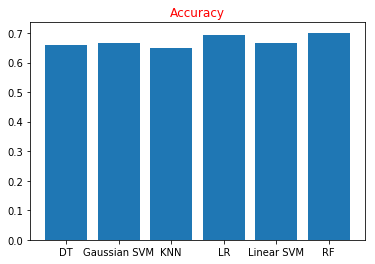

In [23]:
x=["LR","KNN","Linear SVM","DT","Gaussian SVM","RF"]
y=[ac_lr,ac_knn,ac_svm,ac_dt,ac_sv,ac_rfc]
plt.bar(x,y)
plt.title("Accuracy",color='r')
plt.legend

In [25]:
!pip install watson-machine-learning-client --upgrade

Requirement already up-to-date: watson-machine-learning-client in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (1.0.365)
Requirement not upgraded as not directly required: certifi in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2019.3.9)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2.18.4)
Requirement not upgraded as not directly required: pandas in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (0.21.0)
Requirement not upgraded as not directly required: ibm-cos-sdk in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2.0.1)
Requirement not upgraded as not directly required: urllib3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (1.22)
Requirement not upgraded as not di

In [26]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
2019-05-23 05:03:07,620 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.
2019-05-23 05:03:54,339 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [27]:
wml_credentials={
  "access_key":"88Hu_GnbmTKalcKSy6Z6poJqWke8TkC9_Q8ARbnHkzhH",
  "instance_id":"f012e427-0872-4b79-b98a-71e39e402311",
  "password":"de55ef26-f4d4-4f93-9a1e-d4fae1fbd610",
  "url":"https://eu-gb.ml.cloud.ibm.com",
  "username":"0aadb817-71c9-4efa-b747-5c8c429a19a8"
}

In [28]:
client = WatsonMachineLearningAPIClient(wml_credentials)
import json

In [29]:
instance_details = client.service_instance.get_details()
print(json.dumps(instance_details, indent=2))

{
  "entity": {
    "plan_id": "3f6acf43-ede8-413a-ac69-f8af3bb0cbfe",
    "organization_guid": "N/A",
    "published_models": {
      "url": "https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f012e427-0872-4b79-b98a-71e39e402311/published_models"
    },
    "account": {
      "type": "STANDARD",
      "id": "bfe1cab5e3414176901c055dc4aa8246",
      "name": "Medikonda Naga sekhar's Account"
    },
    "owner": {
      "email": "medikondanagasekharreddy@gmail.com",
      "ibm_id": "5500034QJQ",
      "beta_user": false,
      "user_id": "834f04b1-c336-4ae9-abd5-0b5f91897f56",
      "country_code": "IND"
    },
    "region": "eu-gb",
    "space_guid": "N/A",
    "status": "Active",
    "deployments": {
      "url": "https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f012e427-0872-4b79-b98a-71e39e402311/deployments"
    },
    "plan": "lite",
    "tags": null,
    "usage": {
      "gpu_count_p100": {
        "limit": 0,
        "current": 0
      },
      "computation_time": {
        "limit":

In [30]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Naga sekhar", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "medikondanagasekharreddy@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Random Forest"}

In [33]:
model_artifact =client.repository.store_model(rfc, meta_props=model_props)

In [34]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [35]:
published_model_uid

'a0c6f888-5551-4a6a-a2e4-dd06b12f3c50'

In [37]:
created_deployment = client.deployments.create(published_model_uid, name="Liver patient Analysis")



#######################################################################################

Synchronous deployment creation for uid: 'a0c6f888-5551-4a6a-a2e4-dd06b12f3c50' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='ff1d6289-a89e-4602-a17b-67c1b9ed4131'
------------------------------------------------------------------------------------------------




In [38]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f012e427-0872-4b79-b98a-71e39e402311/deployments/ff1d6289-a89e-4602-a17b-67c1b9ed4131/online'

In [39]:
client.deployments.list()

------------------------------------  ----------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                    TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
ff1d6289-a89e-4602-a17b-67c1b9ed4131  Liver patient Analysis  online  DEPLOY_SUCCESS  2019-05-23T05:06:18.857Z  scikit-learn-0.19  model
7ffcf530-a988-449b-9bca-0cc53ede2123  multilinear             online  DEPLOY_SUCCESS  2019-05-23T05:04:49.203Z  scikit-learn-0.19  model
e9ffbd20-e2c8-4441-b13f-9bbf957e6972  multilinear             online  DEPLOY_SUCCESS  2019-05-18T05:13:05.184Z  scikit-learn-0.19  model
------------------------------------  ----------------------  ------  --------------  ------------------------  -----------------  -------------
